## Model 1: CNN

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Load and preprocess the MNIST dataset

In [10]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

Creating the architecture of the model

In [28]:
CNNmodel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ),    
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [29]:
CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
CNNmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_22 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_23 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                      

## Model traning

In [31]:
history = CNNmodel.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 66s 43ms/step - loss: 0.2180 - accuracy: 0.9390 - val_loss: 0.0629 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0997 - accuracy: 0.9711 - val_loss: 0.0670 - val_accuracy: 0.9812
Epoch 3/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0853 - accuracy: 0.9765 - val_loss: 0.0598 - val_accuracy: 0.9834
Epoch 4/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0663 - accuracy: 0.9805 - val_loss: 0.0609 - val_accuracy: 0.9836
Epoch 5/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0639 - accuracy: 0.9816 - val_loss: 0.0589 - val_accuracy: 0.9861
Epoch 6/10
1500/1500 [==============================] - 58s 38ms/step - loss: 0.0560 - accuracy: 0.9838 - val_loss: 0.0543 - val_accuracy: 0.9858
Epoch 7/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0486 - accuracy: 0.9861 - val_loss: 0.0490 -

## Confusion Matrix

313/313 [==============================] - 2s 7ms/step


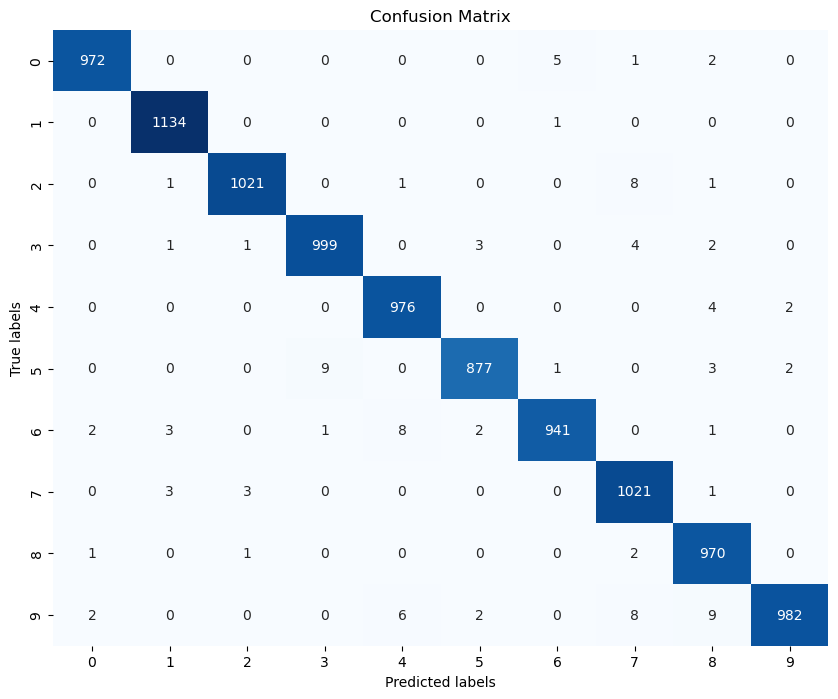

In [32]:
y_pred = CNNmodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Misclassification Exploration

313/313 [==============================] - 2s 7ms/step


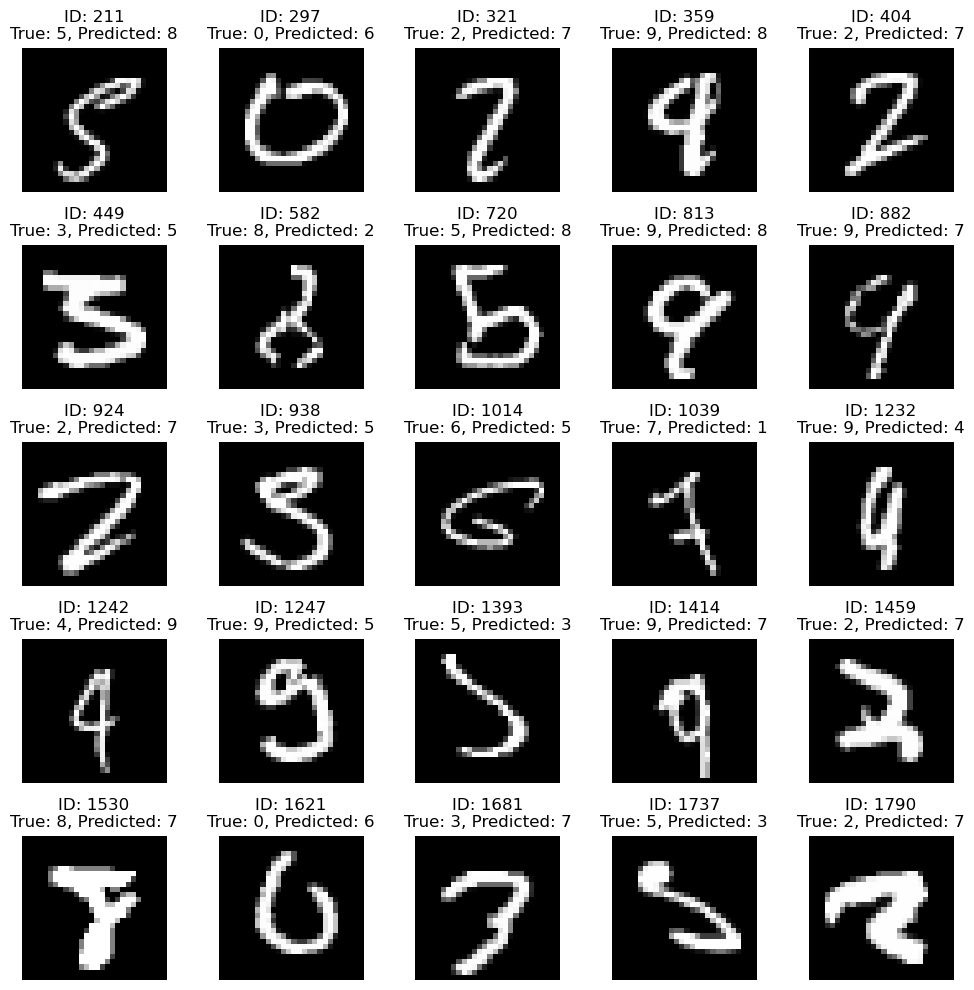

In [33]:
y_pred = CNNmodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

misclassified_indices = np.where(y_pred_classes != y_test)[0]

num_rows = 5
num_cols = 5
num_samples = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, idx in enumerate(misclassified_indices[:num_samples]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'ID: {idx}\nTrue: {y_test[idx]}, Predicted: {y_pred_classes[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Here we can see, some of the misclassified images are hard to recognize even with human eyes. Therefore, the quality of data available dictates that it is impossible to achieve 100% accuracy - one can be close enough though with a well parameterized model.

The nature of data aside, there are indeed common misclassifications across certain numbers. 8 and 2 are intuitively easily mixed up, if the lower loop of '8' is not fully closed or if '2' has a round bottom part;'3' can be confused with '5', '8', or '9' due to their rounded shapes and similar segments. If the middle part of the '3' is not prominent, it could resemble '8' or '9'; '8' and '3' or '5' confusion might occur due to similarities in the loops and round parts of these numbers.

## Final accuracy of the model on test

In [27]:
print('This model predicts '+str(CNNmodel.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 4s 12ms/step - loss: 0.0340 - accuracy: 0.9912
This model predicts 99.11999702453613% of the test data correctly


After fitting the entire training data, the model predicts ~99.12% test images correctly. This implies that the model successfully grasped the majority of features in each number, and identified handwritings quite clearly. It is quite obvious to see that numbers with unique characteristics, like 9 and 0, are hardly misclassified, while numbers that are very close to others, only differentiated by small features such as closeness of a circle (like 6 and 5) or color-filledness of a certain area (like 8 and 1), are often mislabeled.

From the confusion matrix, we can also find commonly misclassified pairs: a total of four 7s are misclassified as 1, but quite surprisingly the model deals really well between 0 and 6. But 3 and 8 seem to be an unexpected headache - 5s through 9s are continously misclassified as 3, and almost every number can be misclassified into 8; probably because the model cannot clearly define the closedness or stand-outness of certain local features.